In [1]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 12,9

# импортируем нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Делаем ДФ из всех файлов
names_by_year = {}
for year in range(1880, 2019):
    names_by_year[year] = pd.read_csv(
        r'''C:\Users\tatia\dev\Home_Task_01_07_Data_analists\names\yob{}.txt'''.format(year),
        names=['Name','Gender','Count']
    )
names_all = pd.concat(names_by_year).reset_index(level=1, drop=True)
names_all


,Name,Gender,Count
1880,Mary,F,7065
1880,Anna,F,2604
1880,Emma,F,2003
1880,Elizabeth,F,1939
1880,Minnie,F,1746
1880,Margaret,F,1578
1880,Ida,F,1472
1880,Alice,F,1414
1880,Bertha,F,1320
1880,Sarah,F,1288


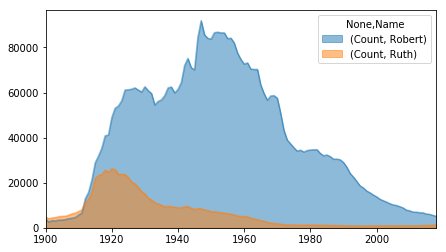

In [21]:
# Построить график изменения количества имен Ruth и Robert с 1900 по 2000.

names_group = names_all.groupby([names_all.index, 'Name']).sum()
idx = pd.IndexSlice
names = names_group.loc[idx[1900:,['Ruth', 'Robert']],:]
names.unstack('Name').plot(kind='area', figsize=(7, 4), stacked=False)

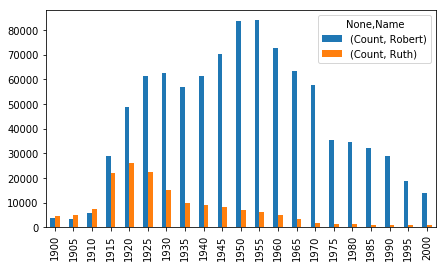

In [22]:
# Задача 2. Построить гистограмму по количеству их имен с 1900 по 2000 с 5-летними промежутками (1900, 1905, 1910, …, 1995, 2000).

# Возьмем прошлую выборку и поменяем шаг.
names_2 = names.loc[range(1900,2001, 5)]
names_2.unstack().plot(kind='bar', figsize=(7, 4))

# Можно добавить для красоты
# plt.xlabel('Year')
# plt.ylabel('Count')
# plt.title('Count names Ruth и Robert')


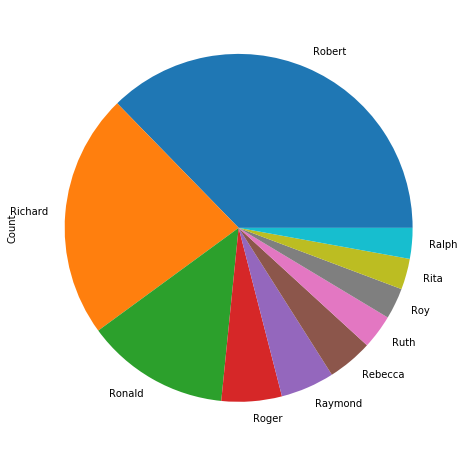

In [23]:
# Задача 2.Построить круговую диаграмму по количеству употреблений для ТОП-10 популярных имен, начинающихся на R, за 1950 год.

names_group_2 = names_group.loc[1950].sort_values('Count', ascending=False)
names_group_2 = names_group_2[names_group_2.index.str.startswith('R')].head(10)

names_group_2.plot(kind='pie', y='Count', figsize=(8, 8), legend=False)

In [398]:
# Построить точечную диаграмму по количеству согласных букв в именах и частоте употребления за 100 лет. 
# Т.е. необходимо сложить всю статистику с 1900 до 2000, 
# сгруппировать по именам, 
# посчитать количество согласных букв в каждом имени 
# и вывести на график отношение "Количество согласных букв в имени" : "Количество употреблений"

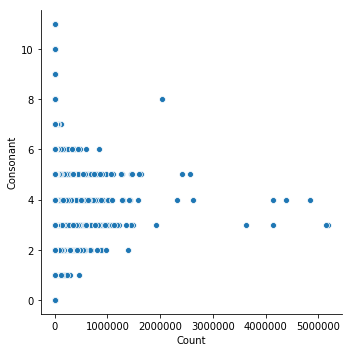

In [91]:
names_group_2 = names_group.reset_index(level=0, drop=True)
names_group_2 = names_group_2.groupby([names_group_2.index]).sum()
names_group_2['Vowels'] = names_group_2.index.str.lower().str.count(r'[aeiou]')
names_group_2['Consonant'] = names_group_2.index.str.lower().str.count(r'[a-z]') - names_group_2['Vowels']

sns.relplot(x='Count', y='Consonant', data=names_group_2)